# Tráfico y turistas: ¿Un cóctel explosivo?

La ciudad de Barcelona se ubica entre uno de los destinos predilectos a la hora de hacer turismo en España. Sumado a esto, suele tratarse además de uno de los sitios preferidos a la hora de emigrar, influyendo en esta decisión factores como ser el idioma, la ubicación geográfica, la cultura y la facilidad a la hora de insertarse en la sociedad, entre otros.

A pesar de contar con medios de transporte públicos muy efectivos (metros, ferrocarriles, teleféricos, entre otros) que luchan por apaciguar el gran caudal de personas que se desplazan de un lado a otro, es cierto que muchos continúan eligiendo su transporte personal  para transitar por la ciudad.

A lo largo del año, pero principalmente en los meses en los que el clima más acompaña, Barcelona recibe un abultado número de turistas que se aprovechan de su geografía para disfrutar de unas vacaciones inolvidables. De esta manera, al llegar los meses de temporada alta, se puede notar que el volumen de personas aumenta por encima de lo habitual en las zonas mayor atractivo turístico.

Se intenta evaluar qué influencia tiene esta muchedumbre en la cantidad de accidentes de tráfico que se registran en la ciudad, teniendo en cuenta que, al momento de trasladarse, los turistas tienen, entre las tantas opciones, la posibilidad de elegir transportes particulares para movilizarse, como ser vehículos, ciclomotores o bicicletas de alquiler, sin descartar que los peatones también son una fuente generadora de siniestros, más aun si desconocen la ciudad.

Para realizar foco sobre un objeto de estudio, se plantea la siguiente hipótesis:

### Durante los meses de temporada alta (Julio, Agosto y Septiembre), se registran mayor cantidad de accidentes de tráfico en las zonas más turísticas de la ciudad de Barcelona.

In [1]:
import pandas as pd
import os
import sys
import utils.folders_tb as fo
import utils.mining_data_tb as mi
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Data Wrangling

En el afán de demostrar la hipótesis planteada, se comienza a realizar el tratamiento de los datos recopilados para poder trabajar con ellos posteriormente. Para esto, se crean las correspondientes listas de dataframes, con los datasets de cada año (desde el 2010 hasta el 2020).

In [2]:
lista_df_gu = fo.enlistar_dataframes('_ACCIDENTS_GU_BCN_')

Al tratarse de diferentes conjuntos de datos (uno para cada año), es probable que el formato utilizado para recopilar la información haya sufrido algunas modificaciones que deberían subsanarse.

Se comparan las columnas de los dataframes de cada año para verificarlo.

In [3]:
mi.comparar_columnas(lista_df_gu)

Las columnas de 0 (25) y 1 (25) COINCIDEN.
Las columnas de 1 (25) y 2 (25) COINCIDEN.
Las columnas de 2 (25) y 3 (25) COINCIDEN.
Las columnas de 3 (25) y 4 (25) COINCIDEN.

Las columnas de 4 (25) y 5 (25) SON DISTINTAS.

         Posición de columna diferente: 0
         ---------------------------------
         Columna de DF en posición 4: Número d'expedient
         Columna de DF en posición 5: Número d expedient

         Posición de columna diferente: 3
         ---------------------------------
         Columna de DF en posición 4: NK barri
         Columna de DF en posición 5: Codi barri

         Posición de columna diferente: 9
         ---------------------------------
         Columna de DF en posición 4: Dia de setmana
         Columna de DF en posición 5: Dia setmana

4 (25) y 6 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 7 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 8 (27) tienen distinta CANTIDAD de columnas.
4 (25) y 9 (27) tienen distinta CANTIDAD de co

In [4]:
mi.nombre_cada_columna(lista_df_gu)

Columna en posición 0

DF en posición 0: Número d'expedient
DF en posición 1: Número d'expedient
DF en posición 2: Número d'expedient
DF en posición 3: Número d'expedient
DF en posición 4: Número d'expedient
DF en posición 5: Número d expedient
DF en posición 6: Numero_expedient
DF en posición 7: Numero_expedient
DF en posición 8: Numero_expedient
DF en posición 9: Numero_expedient
DF en posición 10: Numero_expedient

-------------------------------------

Columna en posición 1

DF en posición 0: Codi districte
DF en posición 1: Codi districte
DF en posición 2: Codi districte
DF en posición 3: Codi districte
DF en posición 4: Codi districte
DF en posición 5: Codi districte
DF en posición 6: Codi_districte
DF en posición 7: Codi_districte
DF en posición 8: Codi_districte
DF en posición 9: Codi_districte
DF en posición 10: Codi_districte

-------------------------------------

Columna en posición 2

DF en posición 0: Nom districte
DF en posición 1: Nom districte
DF en posición 2: Nom dis

Se realiza un análisis de cuáles serían los datos de interés para definir los oportunos a la hora de llevar adelante el estudio.

Se define así, que las columnas que formarán parte del nuevo conjunto de datos serán:
- Número de expediente
- Nombre de distrito
- Nombre de barrio
- Nombre de calle
- Día de la semana
- Año
- Mes
- Día
- Hora
- Turno
- Número de víctimas
- Número de lesionados leves
- Número de lesionados graves
- Número de muertos


In [5]:
df_accidentes = mi.crear_df_gu(lista_df_gu)

In [6]:
df_accidentes

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
0,2010S003688,Sant Martí,el Camp de l'Arpa del Clot,Meridiana,Divendres,2010.0,Maig,28.0,19.0,Tarda,0.0,0.0,0.0,0.0
1,2010S007597,Sant Martí,el Camp de l'Arpa del Clot,Trinxant,Dilluns,2010.0,Novembre,8.0,11.0,Matí,1.0,1.0,0.0,0.0
2,2010S001390,Sant Martí,el Camp de l'Arpa del Clot,Sant Antoni Maria Claret,Dijous,2010.0,Febrer,25.0,13.0,Matí,1.0,1.0,0.0,0.0
3,2010S005416,Sant Martí,el Camp de l'Arpa del Clot,Freser,Dimarts,2010.0,Agost,3.0,14.0,Tarda,1.0,1.0,0.0,0.0
4,2010S008924,Sant Martí,el Camp de l'Arpa del Clot,Indústria,Divendres,2010.0,Desembre,24.0,14.0,Tarda,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102991,2020S006274,Horta-Guinardó,el Carmel,Lluís Marià Vidal,Dijous,2020.0,Desembre,31.0,17.0,Tarda,0.0,0.0,0.0,0.0
102992,2020S006275,Eixample,Sant Antoni,Sepúlveda,Dijous,2020.0,Desembre,31.0,20.0,Tarda,2.0,2.0,0.0,0.0
102993,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Dijous,2020.0,Desembre,31.0,13.0,Matí,2.0,2.0,0.0,0.0
102994,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Dijous,2020.0,Desembre,31.0,21.0,Tarda,2.0,2.0,0.0,0.0


Se realizan algunas búsquedas para diferentes números de expediente como método de verificación.

In [7]:
df_accidentes.iloc[400,:]

NUMERO EXPEDIENTE              2010S004517
DISTRITO               Sarrià-Sant Gervasi
BARRIO                     les Tres Torres
CALLE                             Bonanova
DIA SEMANA                         Dimarts
ANO                                 2010.0
MES                                   Juny
DIA                                   29.0
HORA                                  20.0
TURNO                                Tarda
NUMERO VICTIMAS                        1.0
VICTIMAS LEVES                         1.0
VICTIMAS GRAVES                        0.0
VICTIMAS FALLECIDAS                    0.0
Name: 400, dtype: object

In [8]:
df_accidentes[df_accidentes['NUMERO EXPEDIENTE'] == '2010S004517']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
400,2010S004517,Sarrià-Sant Gervasi,les Tres Torres,Bonanova,Dimarts,2010.0,Juny,29.0,20.0,Tarda,1.0,1.0,0.0,0.0


---

In [9]:
df_accidentes.iloc[8000,:]

NUMERO EXPEDIENTE          2010S008942
DISTRITO                  Ciutat Vella
BARRIO                        el Raval
CALLE                  Litoral (Besòs)
DIA SEMANA                    Dissabte
ANO                             2010.0
MES                           Desembre
DIA                               25.0
HORA                               6.0
TURNO                             Matí
NUMERO VICTIMAS                    0.0
VICTIMAS LEVES                     0.0
VICTIMAS GRAVES                    0.0
VICTIMAS FALLECIDAS                0.0
Name: 8000, dtype: object

In [10]:
df_accidentes[df_accidentes['NUMERO EXPEDIENTE'] == '2010S008942']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
8000,2010S008942,Ciutat Vella,el Raval,Litoral (Besòs),Dissabte,2010.0,Desembre,25.0,6.0,Matí,0.0,0.0,0.0,0.0


---

In [11]:
df_accidentes.iloc[38000,:]

NUMERO EXPEDIENTE                        2014S002077
DISTRITO                                  Sant Martí
BARRIO                 la Vila Olímpica del Poblenou
CALLE                            Litoral (Llobregat)
DIA SEMANA                                    Dijous
ANO                                           2014.0
MES                                             Març
DIA                                             20.0
HORA                                            15.0
TURNO                                          Tarda
NUMERO VICTIMAS                                  1.0
VICTIMAS LEVES                                   1.0
VICTIMAS GRAVES                                  0.0
VICTIMAS FALLECIDAS                              0.0
Name: 38000, dtype: object

In [12]:
df_accidentes[df_accidentes['NUMERO EXPEDIENTE'] == '2014S002077']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
38000,2014S002077,Sant Martí,la Vila Olímpica del Poblenou,Litoral (Llobregat),Dijous,2014.0,Març,20.0,15.0,Tarda,1.0,1.0,0.0,0.0


---

In [13]:
df_accidentes.iloc[88000,:]

NUMERO EXPEDIENTE                                        2019S001301    
DISTRITO                                                        Eixample
BARRIO                                                       Sant Antoni
CALLE                  Viladomat / Corts Catalanes                   ...
DIA SEMANA                                                       Dilluns
ANO                                                               2019.0
MES                                                               Febrer
DIA                                                                 18.0
HORA                                                                14.0
TURNO                                                              Tarda
NUMERO VICTIMAS                                                      1.0
VICTIMAS LEVES                                                       1.0
VICTIMAS GRAVES                                                      0.0
VICTIMAS FALLECIDAS                                

In [14]:
df_accidentes.iloc[88000,:]['NUMERO EXPEDIENTE']

'2019S001301    '

In [15]:
df_accidentes.iloc[88000,:]['CALLE']

'Viladomat / Corts Catalanes                       '

In [16]:
df_accidentes[df_accidentes['NUMERO EXPEDIENTE'] == '2019S001301    ']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
88000,2019S001301,Eixample,Sant Antoni,Viladomat / Corts Catalanes ...,Dilluns,2019.0,Febrer,18.0,14.0,Tarda,1.0,1.0,0.0,0.0


---

In [17]:
df_accidentes.iloc[100000,:]

NUMERO EXPEDIENTE      2020S003281    
DISTRITO                      Eixample
BARRIO                   el Fort Pienc
CALLE                  Corts Catalanes
DIA SEMANA                     Dilluns
ANO                             2020.0
MES                             Juliol
DIA                               20.0
HORA                              13.0
TURNO                             Matí
NUMERO VICTIMAS                    2.0
VICTIMAS LEVES                     2.0
VICTIMAS GRAVES                    0.0
VICTIMAS FALLECIDAS                0.0
Name: 100000, dtype: object

In [18]:
df_accidentes[df_accidentes['NUMERO EXPEDIENTE'] == '2020S003281    ']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
100000,2020S003281,Eixample,el Fort Pienc,Corts Catalanes,Dilluns,2020.0,Juliol,20.0,13.0,Matí,2.0,2.0,0.0,0.0


Se observa un inconveniente. Aparentemente, para los últimos años, se han agregado espacios en blanco al final de algunos strings. Se procede a corregir este obstáculo para contar con datos unificados.

In [19]:
mi.quitar_espacios(df_accidentes)

Ahora se puede ver cómo los strings no cuentan con espacios en blanco ni al inicio ni al final.

In [20]:
df_accidentes.iloc[88000,:]

NUMERO EXPEDIENTE                      2019S001301
DISTRITO                                  Eixample
BARRIO                                 Sant Antoni
CALLE                  Viladomat / Corts Catalanes
DIA SEMANA                                 Dilluns
ANO                                         2019.0
MES                                         Febrer
DIA                                           18.0
HORA                                          14.0
TURNO                                        Tarda
NUMERO VICTIMAS                                1.0
VICTIMAS LEVES                                 1.0
VICTIMAS GRAVES                                0.0
VICTIMAS FALLECIDAS                            0.0
Name: 88000, dtype: object

In [21]:
df_accidentes.iloc[100000,:]

NUMERO EXPEDIENTE          2020S003281
DISTRITO                      Eixample
BARRIO                   el Fort Pienc
CALLE                  Corts Catalanes
DIA SEMANA                     Dilluns
ANO                             2020.0
MES                             Juliol
DIA                               20.0
HORA                              13.0
TURNO                             Matí
NUMERO VICTIMAS                    2.0
VICTIMAS LEVES                     2.0
VICTIMAS GRAVES                    0.0
VICTIMAS FALLECIDAS                0.0
Name: 100000, dtype: object

## Data Cleaning

Continuando con la limpieza de los datos para su posterior visualización, se desea verificar la presencia de datos duplicados, para que los mismos no generen resultados alterados indebidos.

In [22]:
print('Dimensiones de df_accidentes:  Filas --> ' + str(df_accidentes.shape[0]) + '  Columnas --> ' + str(df_accidentes.shape[1]) + '\n')
print('Cantidad de números de expediente duplicados en df_accidentes:' , df_accidentes['NUMERO EXPEDIENTE'].duplicated().sum(), '\n')
print('Cantidad de filas duplicadas de df_accidentes:' , df_accidentes.duplicated().sum())


Dimensiones de df_accidentes:  Filas --> 102996  Columnas --> 14

Cantidad de números de expediente duplicados en df_accidentes: 21 

Cantidad de filas duplicadas de df_accidentes: 21


Como se puede observar, el dataframe cuenta con 102996 filas, de las cuales hay 21 que tienen exactamente los mismos datos. Éstas filas generarían una desviación en el análisis, por lo que deben ser removidas.

In [23]:
df_accidentes.drop_duplicates(inplace = True, ignore_index= True)

In [24]:
print('Dimensiones de df_accidentes:  Filas --> ' + str(df_accidentes.shape[0]) + '  Columnas --> ' + str(df_accidentes.shape[1]) + '\n')
print('Cantidad de números de expediente duplicados en df_accidentes:' , df_accidentes['NUMERO EXPEDIENTE'].duplicated().sum(), '\n')
print('Cantidad de filas duplicadas de df_accidentes:' , df_accidentes.duplicated().sum())

Dimensiones de df_accidentes:  Filas --> 102975  Columnas --> 14

Cantidad de números de expediente duplicados en df_accidentes: 0 

Cantidad de filas duplicadas de df_accidentes: 0


Una vez eliminados los datos duplicados, se realiza un análisis de los datos faltantes para definir qué se hará con ellos.

In [25]:
df_accidentes.isnull().sum()

NUMERO EXPEDIENTE      0
DISTRITO               1
BARRIO                 1
CALLE                  2
DIA SEMANA             0
ANO                    1
MES                    1
DIA                    1
HORA                   1
TURNO                  0
NUMERO VICTIMAS        1
VICTIMAS LEVES         1
VICTIMAS GRAVES        1
VICTIMAS FALLECIDAS    1
dtype: int64

Si se evalúan los datos faltantes de la columna "CALLE", se puede observar lo siguiente:

In [26]:
df_accidentes[df_accidentes['CALLE'].isna()]

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
56285,10/02/2016,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,13:25:52,NaN,NaN,NaN,NaN
84385,2018S008677,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",NaN,Dilluns,2018.0,Novembre,12.0,0.0,Nit,0.0,0.0,0.0,0.0


De los 2 datos faltantes de la columna "CALLE", uno corresponde a una serie de valores anómalos que no aportan valor a la investigación y deben ser eliminados. Paralelamente, el otro, representa un accidente al cual, efectivamente, no se le ha ingresado ningún nombre de calle. Dicho valor nulo no genera mayores inconvenientes para el análisis, por lo que puede permanecer en el dataframe para no perder el dato del accidente.

In [27]:
df_accidentes.drop(df_accidentes.index[56285], inplace= True)

In [28]:
df_accidentes.reset_index(drop=True, inplace= True)
df_accidentes

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
0,2010S003688,Sant Martí,el Camp de l'Arpa del Clot,Meridiana,Divendres,2010.0,Maig,28.0,19.0,Tarda,0.0,0.0,0.0,0.0
1,2010S007597,Sant Martí,el Camp de l'Arpa del Clot,Trinxant,Dilluns,2010.0,Novembre,8.0,11.0,Matí,1.0,1.0,0.0,0.0
2,2010S001390,Sant Martí,el Camp de l'Arpa del Clot,Sant Antoni Maria Claret,Dijous,2010.0,Febrer,25.0,13.0,Matí,1.0,1.0,0.0,0.0
3,2010S005416,Sant Martí,el Camp de l'Arpa del Clot,Freser,Dimarts,2010.0,Agost,3.0,14.0,Tarda,1.0,1.0,0.0,0.0
4,2010S008924,Sant Martí,el Camp de l'Arpa del Clot,Indústria,Divendres,2010.0,Desembre,24.0,14.0,Tarda,2.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102969,2020S006274,Horta-Guinardó,el Carmel,Lluís Marià Vidal,Dijous,2020.0,Desembre,31.0,17.0,Tarda,0.0,0.0,0.0,0.0
102970,2020S006275,Eixample,Sant Antoni,Sepúlveda,Dijous,2020.0,Desembre,31.0,20.0,Tarda,2.0,2.0,0.0,0.0
102971,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Dijous,2020.0,Desembre,31.0,13.0,Matí,2.0,2.0,0.0,0.0
102972,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Dijous,2020.0,Desembre,31.0,21.0,Tarda,2.0,2.0,0.0,0.0


In [29]:
df_accidentes[df_accidentes['CALLE'].isna()]

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
84384,2018S008677,Sarrià-Sant Gervasi,"Vallvidrera, el Tibidabo i les Planes",NaN,Dilluns,2018.0,Novembre,12.0,0.0,Nit,0.0,0.0,0.0,0.0


In [30]:
df_accidentes.nunique()

NUMERO EXPEDIENTE      102974
DISTRITO                   11
BARRIO                     75
CALLE                    8254
DIA SEMANA                  7
ANO                        11
MES                        12
DIA                        31
HORA                       24
TURNO                       3
NUMERO VICTIMAS            18
VICTIMAS LEVES             17
VICTIMAS GRAVES             5
VICTIMAS FALLECIDAS         4
dtype: int64

Aquí se puede apreciar que, al menos, los valores cualitativos son congruentes. Esto significa, que los mismos cuentan con tantos valores únicos como serían los esperados. Por ejemplo, 31 valores únicos para los días del mes, 7 para los días de la semana, o bien 3 para los turnos de un día.

In [31]:
df_accidentes['DISTRITO'].unique()

array(['Sant Martí', 'Ciutat Vella', 'Eixample', 'Sants-Montjuïc',
       'Les Corts', 'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó',
       'Nou Barris', 'Sant Andreu', 'Desconegut'], dtype=object)

Para el caso de los distritos, se observa un valor "desconocido". Teniendo en cuenta el propósito del estudio, ese valor no es una buena señal, y sería conveniente cuantificarlo. Ésta situación podría presentarse en otras columnas, por lo que se hará una investigación.

In [32]:
df_accidentes[df_accidentes['DISTRITO'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
592,2010S005007,Desconegut,Desconegut,Desconegut,Dissabte,2010.0,Juliol,17.0,7.0,Matí,1.0,1.0,0.0,0.0
1133,2010S001471,Desconegut,Desconegut,Desconegut,Dilluns,2010.0,Març,1.0,14.0,Tarda,1.0,1.0,0.0,0.0
1134,2010S004750,Desconegut,Desconegut,Desconegut,Dijous,2010.0,Juliol,8.0,13.0,Matí,1.0,1.0,0.0,0.0
1690,2010S006049,Desconegut,Desconegut,Desconegut,Dimarts,2010.0,Setembre,7.0,14.0,Tarda,1.0,1.0,0.0,0.0
2244,2010S000804,Desconegut,Desconegut,Desconegut,Dimecres,2010.0,Febrer,3.0,8.0,Matí,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100879,2020S004180,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Setembre,15.0,14.0,Tarda,1.0,1.0,0.0,0.0
101230,2020S004531,Desconegut,Desconegut,Desconegut,Dijous,2020.0,Octubre,1.0,8.0,Matí,1.0,1.0,0.0,0.0
101855,2020S005158,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Novembre,3.0,9.0,Matí,1.0,1.0,0.0,0.0
101976,2020S005279,Desconegut,Desconegut,Desconegut,Dimecres,2020.0,Novembre,11.0,9.0,Matí,1.0,1.0,0.0,0.0


In [33]:
df_accidentes[df_accidentes['BARRIO'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
592,2010S005007,Desconegut,Desconegut,Desconegut,Dissabte,2010.0,Juliol,17.0,7.0,Matí,1.0,1.0,0.0,0.0
1133,2010S001471,Desconegut,Desconegut,Desconegut,Dilluns,2010.0,Març,1.0,14.0,Tarda,1.0,1.0,0.0,0.0
1134,2010S004750,Desconegut,Desconegut,Desconegut,Dijous,2010.0,Juliol,8.0,13.0,Matí,1.0,1.0,0.0,0.0
1690,2010S006049,Desconegut,Desconegut,Desconegut,Dimarts,2010.0,Setembre,7.0,14.0,Tarda,1.0,1.0,0.0,0.0
2244,2010S000804,Desconegut,Desconegut,Desconegut,Dimecres,2010.0,Febrer,3.0,8.0,Matí,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100879,2020S004180,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Setembre,15.0,14.0,Tarda,1.0,1.0,0.0,0.0
101230,2020S004531,Desconegut,Desconegut,Desconegut,Dijous,2020.0,Octubre,1.0,8.0,Matí,1.0,1.0,0.0,0.0
101855,2020S005158,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Novembre,3.0,9.0,Matí,1.0,1.0,0.0,0.0
101976,2020S005279,Desconegut,Desconegut,Desconegut,Dimecres,2020.0,Novembre,11.0,9.0,Matí,1.0,1.0,0.0,0.0


In [34]:
df_accidentes[df_accidentes['CALLE'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
592,2010S005007,Desconegut,Desconegut,Desconegut,Dissabte,2010.0,Juliol,17.0,7.0,Matí,1.0,1.0,0.0,0.0
1133,2010S001471,Desconegut,Desconegut,Desconegut,Dilluns,2010.0,Març,1.0,14.0,Tarda,1.0,1.0,0.0,0.0
1134,2010S004750,Desconegut,Desconegut,Desconegut,Dijous,2010.0,Juliol,8.0,13.0,Matí,1.0,1.0,0.0,0.0
1690,2010S006049,Desconegut,Desconegut,Desconegut,Dimarts,2010.0,Setembre,7.0,14.0,Tarda,1.0,1.0,0.0,0.0
2244,2010S000804,Desconegut,Desconegut,Desconegut,Dimecres,2010.0,Febrer,3.0,8.0,Matí,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100879,2020S004180,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Setembre,15.0,14.0,Tarda,1.0,1.0,0.0,0.0
101230,2020S004531,Desconegut,Desconegut,Desconegut,Dijous,2020.0,Octubre,1.0,8.0,Matí,1.0,1.0,0.0,0.0
101855,2020S005158,Desconegut,Desconegut,Desconegut,Dimarts,2020.0,Novembre,3.0,9.0,Matí,1.0,1.0,0.0,0.0
101976,2020S005279,Desconegut,Desconegut,Desconegut,Dimecres,2020.0,Novembre,11.0,9.0,Matí,1.0,1.0,0.0,0.0


La estrategia que se sigue en esta situación, es la de reemplazar los valores perdidos ``"Desconegut"`` por valores NaN. De esta manera, nuestros datos relacionados con las columnas restantes (cuyo valor es conocido), será tenida en cuenta en el análisis exploratorio, mientras que el valor ``"Desconegut"`` no será tomado como un dato, ya sea de ``distrito``, ``barrio`` o ``calle``.

In [35]:
df_accidentes.replace('Desconegut', np.nan, inplace = True)

In [36]:
df_accidentes[df_accidentes['DISTRITO'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS


In [37]:
df_accidentes[df_accidentes['BARRIO'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS


In [38]:
df_accidentes[df_accidentes['CALLE'] == 'Desconegut']

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS


Ahora, se debe tener en cuenta cuál es el tipo de valor de cada una de las columnas.

In [39]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102974 entries, 0 to 102973
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   NUMERO EXPEDIENTE    102974 non-null  object 
 1   DISTRITO             102777 non-null  object 
 2   BARRIO               102777 non-null  object 
 3   CALLE                102722 non-null  object 
 4   DIA SEMANA           102974 non-null  object 
 5   ANO                  102974 non-null  float64
 6   MES                  102974 non-null  object 
 7   DIA                  102974 non-null  float64
 8   HORA                 102974 non-null  float64
 9   TURNO                102974 non-null  object 
 10  NUMERO VICTIMAS      102974 non-null  float64
 11  VICTIMAS LEVES       102974 non-null  float64
 12  VICTIMAS GRAVES      102974 non-null  float64
 13  VICTIMAS FALLECIDAS  102974 non-null  float64
dtypes: float64(7), object(7)
memory usage: 11.0+ MB


La presencia de valores NaN en las columnas numéricas ha generado que, los números presentes en el dataframe, que se esperaría sean del tipo "int", figuren como "float64". Esto se puede remediar de la siguiente manera:

In [40]:
df_accidentes = df_accidentes.astype({"ANO": int, "DIA": int, "HORA": int, "NUMERO VICTIMAS": int, "VICTIMAS LEVES": int, "VICTIMAS GRAVES": int, "VICTIMAS FALLECIDAS": int})

In [41]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102974 entries, 0 to 102973
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   NUMERO EXPEDIENTE    102974 non-null  object
 1   DISTRITO             102777 non-null  object
 2   BARRIO               102777 non-null  object
 3   CALLE                102722 non-null  object
 4   DIA SEMANA           102974 non-null  object
 5   ANO                  102974 non-null  int32 
 6   MES                  102974 non-null  object
 7   DIA                  102974 non-null  int32 
 8   HORA                 102974 non-null  int32 
 9   TURNO                102974 non-null  object
 10  NUMERO VICTIMAS      102974 non-null  int32 
 11  VICTIMAS LEVES       102974 non-null  int32 
 12  VICTIMAS GRAVES      102974 non-null  int32 
 13  VICTIMAS FALLECIDAS  102974 non-null  int32 
dtypes: int32(7), object(7)
memory usage: 8.2+ MB


In [42]:
df_accidentes

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
0,2010S003688,Sant Martí,el Camp de l'Arpa del Clot,Meridiana,Divendres,2010,Maig,28,19,Tarda,0,0,0,0
1,2010S007597,Sant Martí,el Camp de l'Arpa del Clot,Trinxant,Dilluns,2010,Novembre,8,11,Matí,1,1,0,0
2,2010S001390,Sant Martí,el Camp de l'Arpa del Clot,Sant Antoni Maria Claret,Dijous,2010,Febrer,25,13,Matí,1,1,0,0
3,2010S005416,Sant Martí,el Camp de l'Arpa del Clot,Freser,Dimarts,2010,Agost,3,14,Tarda,1,1,0,0
4,2010S008924,Sant Martí,el Camp de l'Arpa del Clot,Indústria,Divendres,2010,Desembre,24,14,Tarda,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102969,2020S006274,Horta-Guinardó,el Carmel,Lluís Marià Vidal,Dijous,2020,Desembre,31,17,Tarda,0,0,0,0
102970,2020S006275,Eixample,Sant Antoni,Sepúlveda,Dijous,2020,Desembre,31,20,Tarda,2,2,0,0
102971,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Dijous,2020,Desembre,31,13,Matí,2,2,0,0
102972,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Dijous,2020,Desembre,31,21,Tarda,2,2,0,0


Otro inconveniente que se puede observar en el dataframe, pensando ya en el momento de la presentación del mismo, es el idioma. Teniendo en cuenta que el proyecto se expondrá ante un público que posiblemente no domine perfectamente la lengua catalana, no estaría demás realizar la conversión al castellano. Para esto, es adecuado centrarse en las columnas que contienen datos a traducir. Estas son:
- Día de la semana
- Mes
- Turno

In [43]:
df_accidentes['DIA SEMANA'].unique()

array(['Divendres', 'Dilluns', 'Dijous', 'Dimarts', 'Dimecres',
       'Diumenge', 'Dissabte'], dtype=object)

In [44]:
df_accidentes['MES'].unique()

array(['Maig', 'Novembre', 'Febrer', 'Agost', 'Desembre', 'Juny',
       'Juliol', 'Setembre', 'Març', 'Gener', 'Octubre', 'Abril'],
      dtype=object)

In [45]:
df_accidentes['TURNO'].unique()

array(['Tarda', 'Matí', 'Nit'], dtype=object)

In [46]:
mi.translate(df_accidentes)

In [47]:
df_accidentes

,NUMERO EXPEDIENTE,DISTRITO,BARRIO,CALLE,DIA SEMANA,ANO,MES,DIA,HORA,TURNO,NUMERO VICTIMAS,VICTIMAS LEVES,VICTIMAS GRAVES,VICTIMAS FALLECIDAS
0,2010S003688,Sant Martí,el Camp de l'Arpa del Clot,Meridiana,Viernes,2010,Mayo,28,19,Tarde,0,0,0,0
1,2010S007597,Sant Martí,el Camp de l'Arpa del Clot,Trinxant,Lunes,2010,Noviembre,8,11,Mañana,1,1,0,0
2,2010S001390,Sant Martí,el Camp de l'Arpa del Clot,Sant Antoni Maria Claret,Jueves,2010,Febrero,25,13,Mañana,1,1,0,0
3,2010S005416,Sant Martí,el Camp de l'Arpa del Clot,Freser,Martes,2010,Agosto,3,14,Tarde,1,1,0,0
4,2010S008924,Sant Martí,el Camp de l'Arpa del Clot,Indústria,Viernes,2010,Diciembre,24,14,Tarde,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102969,2020S006274,Horta-Guinardó,el Carmel,Lluís Marià Vidal,Jueves,2020,Diciembre,31,17,Tarde,0,0,0,0
102970,2020S006275,Eixample,Sant Antoni,Sepúlveda,Jueves,2020,Diciembre,31,20,Tarde,2,2,0,0
102971,2020S006276,Ciutat Vella,el Barri Gòtic,Litoral (Llobregat),Jueves,2020,Diciembre,31,13,Mañana,2,2,0,0
102972,2020S006277,Eixample,la Nova Esquerra de l'Eixample,Aragó,Jueves,2020,Diciembre,31,21,Tarde,2,2,0,0


Una vez finalizado el Data Cleaning de nuestro conjunto de datos, es recomendable guardar el dataframe obtenido en un fichero .csv en la dirección data/DATA_POST_CLEANING para su rápida lectura y manipulación. Se logra mediante la ejecución de la siguiente función:

In [48]:
fo.df_to_csv_post_cleaning(df_accidentes, 'accidentes.csv')

A partir de ahora, se puede realizar la lectura del archivo obtenido luego de hacer el Data Cleaning de la siguiente manera:

In [49]:
accidentes = fo.leer_csv_post_cleaning('accidentes.csv')

# Análisis Exploratorio de Datos

Ya se tienen a disposición todos los datos limpios y preparados para comenzar a analizarlos. La visualización de los mismos mediante gráficas es una gran metodología para evalarlos y obtener conclusiones.

En una primera instancia, se intenta determinar cuáles son los distritos en los que los accidentes ocurren con mayor frecuencia.

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


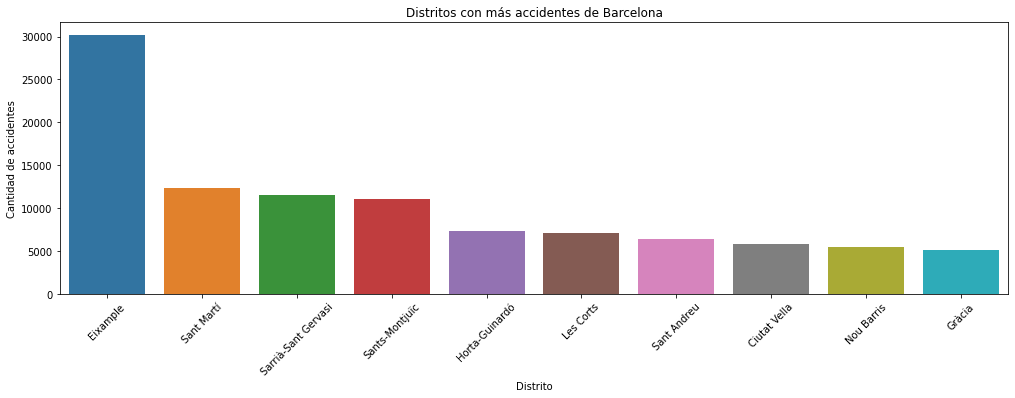

In [50]:
plt.figure(figsize=(17,5))
sns.countplot(accidentes['DISTRITO'], order= accidentes['DISTRITO'].value_counts().index)
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Distrito')
plt.xticks(rotation = 45)
plt.title('Distritos con más accidentes de Barcelona')
font = {'size': 22}
plt.savefig("../reports/plots/accidentes_x_distrito.png")

Se puede ver que para todos los registros disponibles, el distrito de Eixample es el que contabiliza, con creces, el mayor número de accidentes.

Si se realiza un análisis más exhaustivo, pensando ahora en cuáles son los barrios con más cantidad de accidentes entre los años 2010 y 2020. Se obtiene lo siguiente.



C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


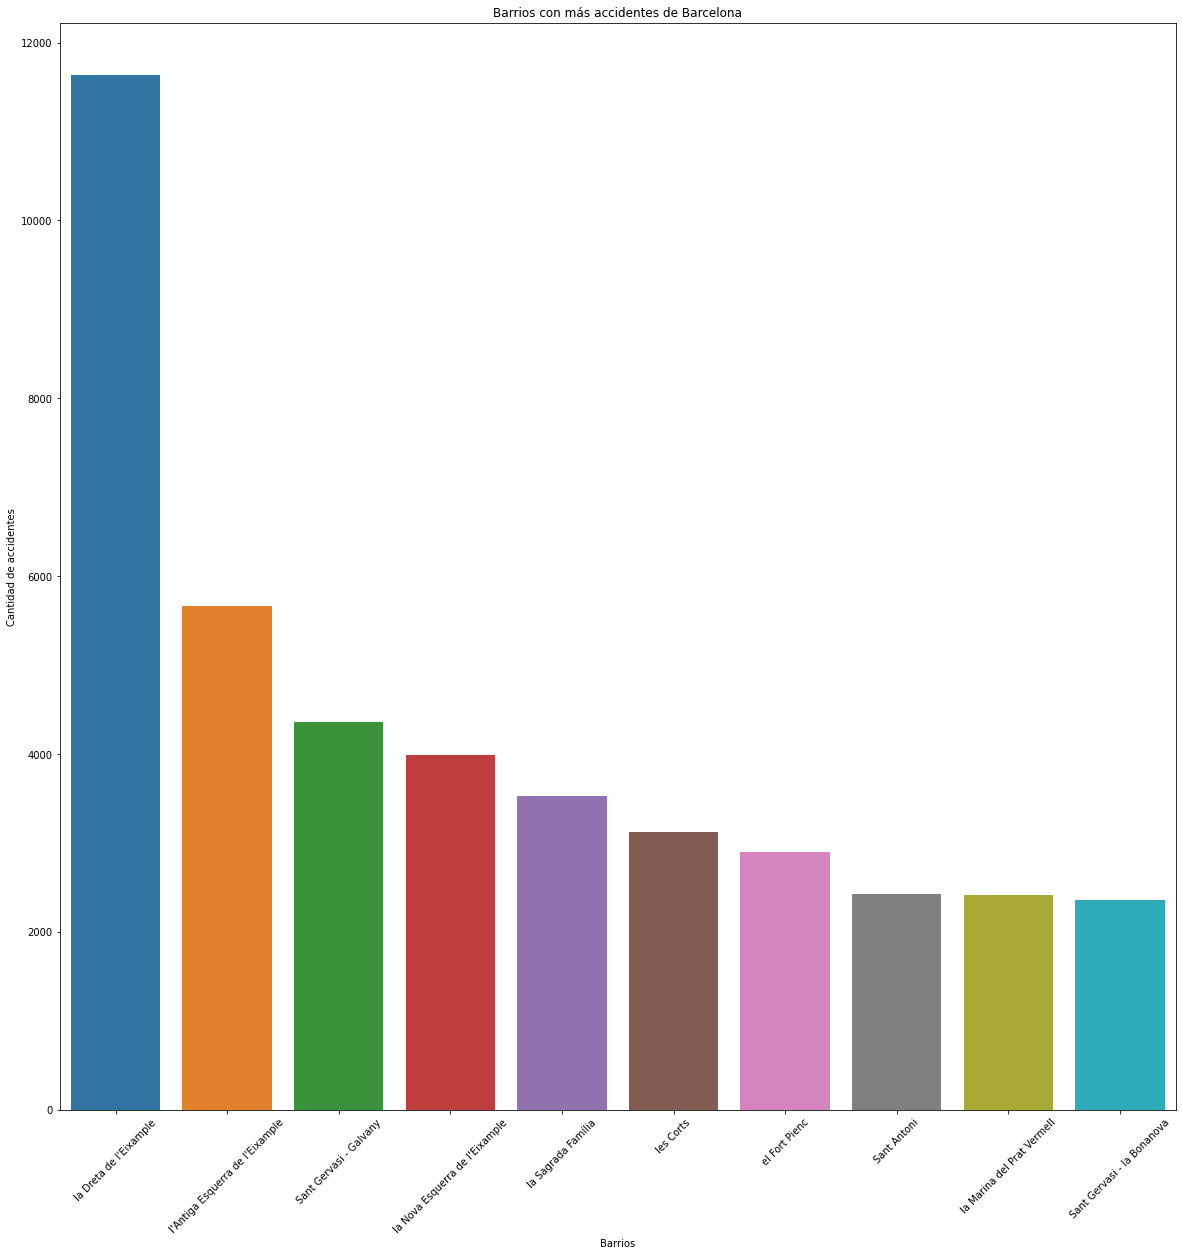

In [51]:
plt.figure(figsize=(20,20))
sns.countplot(accidentes['BARRIO'], order= accidentes['BARRIO'].value_counts().index[0:10])
plt.xticks(rotation = 45)
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Barrios')
plt.title('Barrios con más accidentes de Barcelona')
font = {'size': 28}
plt.savefig("../reports/plots/10_barrios_mas_accidentes.png")

Y si ahora se quisiera saber cuáles son las calles que pueden considerarse más peligrosas a la hora de circular:

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


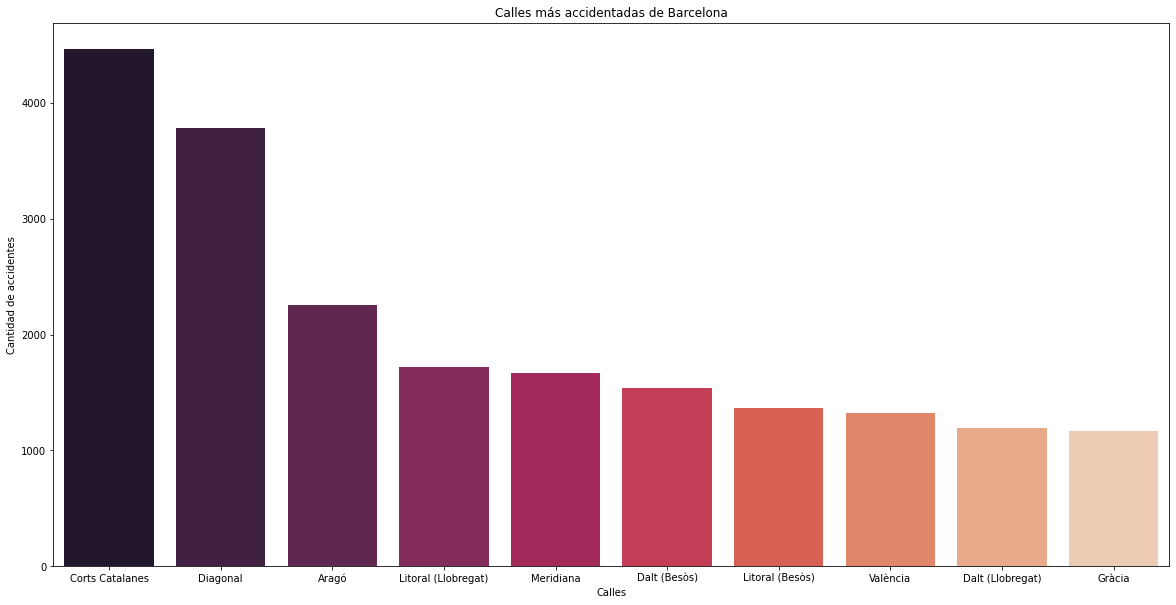

In [52]:
plt.figure(figsize=(20,10))
sns.countplot(accidentes['CALLE'], order= accidentes['CALLE'].value_counts().index[0:10], palette='rocket')
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Calles')
plt.title('Calles más accidentadas de Barcelona')
font = {'size': 22}
plt.savefig("../reports/plots/10_calles_mas_accidentes.png")

Como es de esperarse, el resultado devela que las calles donde más accidentes se han contabilizado son arterias principales o rondas, donde el caudal vehicular es más elevado.

A su vez, para nuestro objeto de estudio, será necesario cuantificar los accidentes en los barrios considerados más turísticos de la ciudad, obteniendo los siguientes resultados.

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


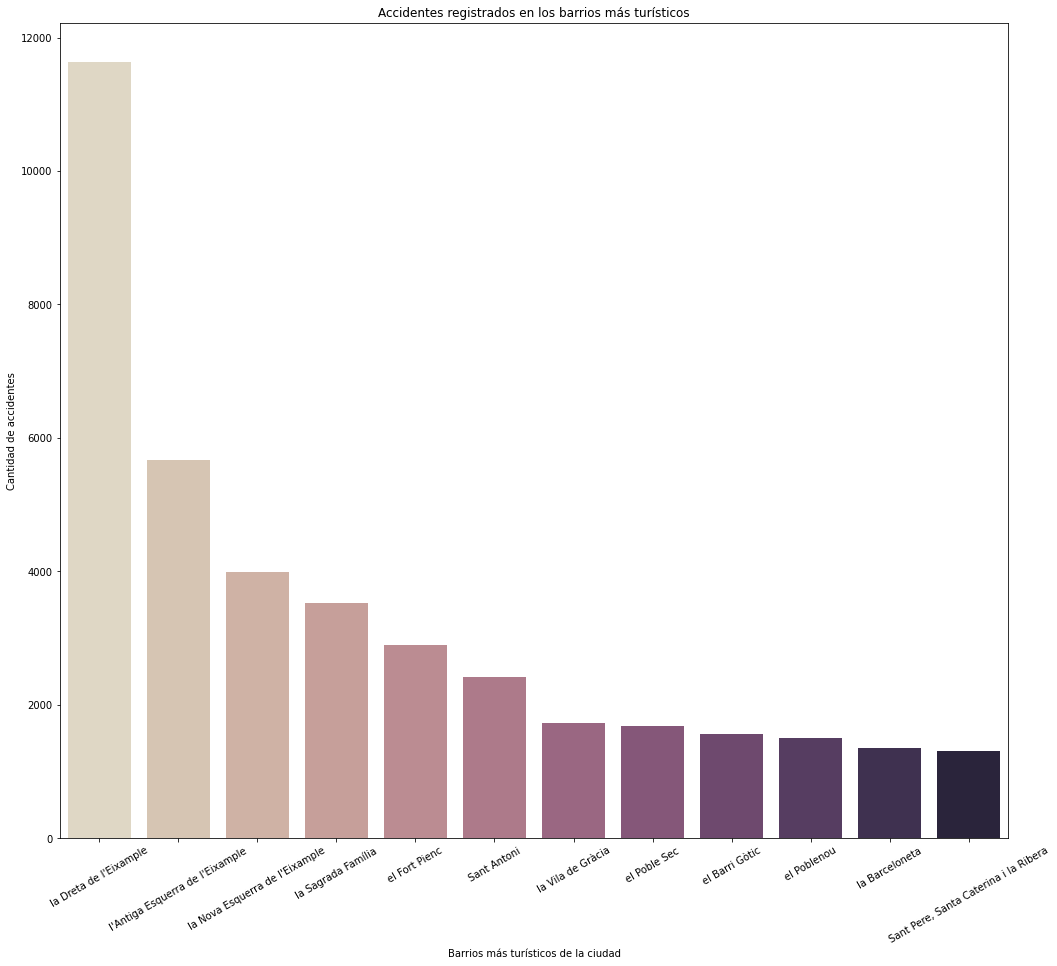

In [53]:
barrios_turisticos = accidentes[(accidentes['BARRIO'] == 'el Barri Gòtic')|(accidentes['BARRIO'] == 'la Barceloneta')|(accidentes['BARRIO'] == 'el Poble Sec')|(accidentes['BARRIO'] == 'el Poblenou')|(accidentes['BARRIO'] == 'Sant Pere, Santa Caterina i la Ribera')|(accidentes['BARRIO'] == 'la Sagrada Família')|(accidentes['BARRIO'] == 'la Nova Esquerra de l\'Eixample')|(accidentes['BARRIO'] == 'el Fort Pienc')|(accidentes['BARRIO'] == "l'Antiga Esquerra de l'Eixample")|(accidentes['BARRIO'] == 'la Dreta de l\'Eixample')|(accidentes['BARRIO'] == 'Sant Antoni')|(accidentes['BARRIO'] == 'la Vila de Gràcia')]


plt.figure(figsize=(17,15))
sns.countplot(barrios_turisticos['BARRIO'], order= barrios_turisticos['BARRIO'].value_counts().index, palette="ch:s=-.2,r=.6")
plt.xticks(rotation = 30)
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Barrios más turísticos de la ciudad')
plt.title('Accidentes registrados en los barrios más turísticos')
font = {'size': 22}
plt.savefig("../reports/plots/accidentes_12_barrios_mas_turisticos.png")

Aquí se puede visualizar que la Dreta de l\'Eixample reporta casi el doble de accidentes que los registrados en el barrio que ocupa el segundo puesto.

Por otro lado, se nota la presencia de barrios que no llegan a los 2000 accidentes contabilizados durante 11 años (2010 a 2020 inclusive). Para entender un poco más esto, se debe tener una idea de la morfología de cada barrio. No está demás aclarar que los barrios pertenecientes al distrito de l'Eixample (los primeros 6 en orden de aparición), cuentan con un caudal de tráfico muy elevado y con arterias principales de desplazamiento, mientras que los últimos tienen un tránsito más bien restringido, con muchas calles de carril único y muchas otras, peatonales.

Teniendo en cuenta ahora lo que es realmente relevante para el objeto de estudio, surge la necesidad de representar los accidentes registrados en los barrios más turísticos, pero ``basándose en el mes de ocurrencia`` de los mismos. A continuación se muestran las gráficas para cada caso, en las cuales se analizarán los meses de Julio, Agosto y Septiembre.

La línea negra vertical en cada una de las siguientes gráficas representa el valor medio de cantidad de accidentes por mes para el barrio en cuestión.

In [54]:
meses = {'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12}

## el Barri Gòtic

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


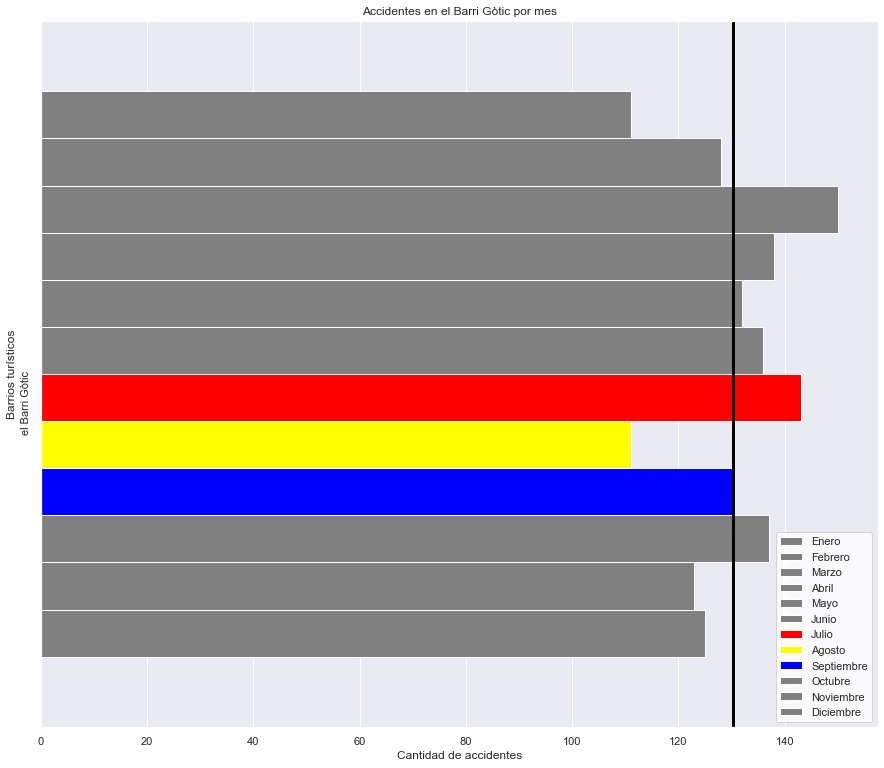

In [55]:
gotic = accidentes[accidentes['BARRIO'] == 'el Barri Gòtic']
gotic.replace(meses, inplace= True)
gotic.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = gotic);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en el Barri Gòtic por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=gotic.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/gotic_x_mes.png");

Julio --> Cantidad por encima de la media.

Agosto --> La menor cantidad de accidentes junto con el mes de Enero.

Septiembre --> Cantidad media de accidentes.

## La Barceloneta

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


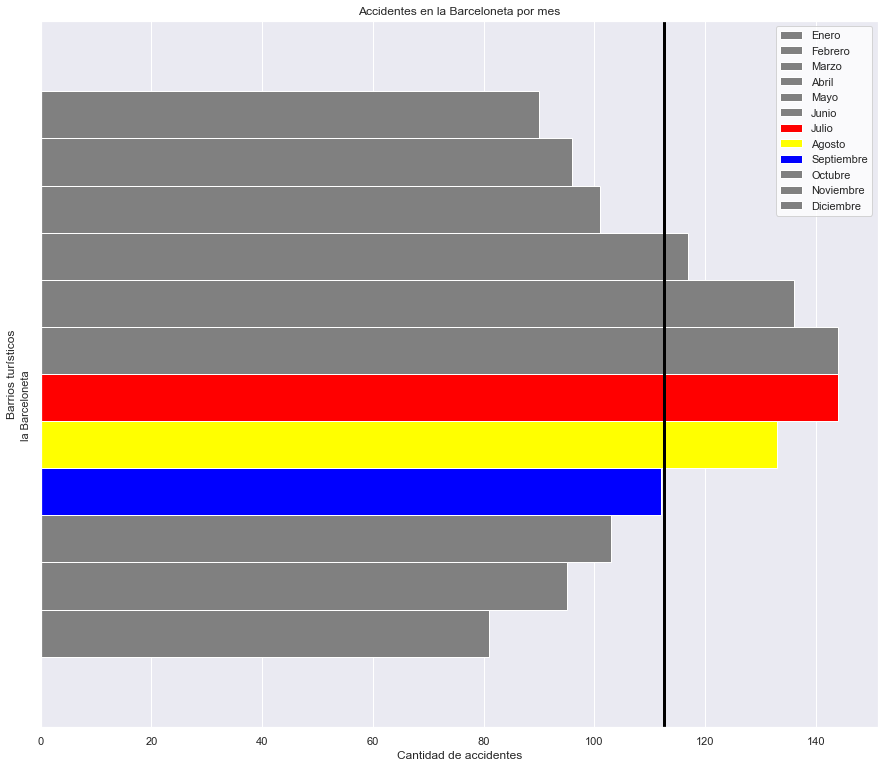

In [56]:
barceloneta = accidentes[accidentes['BARRIO'] == 'la Barceloneta']
barceloneta.replace(meses, inplace= True)
barceloneta.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = barceloneta);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en la Barceloneta por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=barceloneta.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/barceloneta_x_mes.png");

Julio --> Uno de los meses con mayor cantidad de accidentes registrados.

Agosto --> Cantidad elevada de accidentes.

Septiembre --> Cantidad media de accidentes.

Se debe tener en cuenta que el barrio de La Barcelonata cuenta con una de las playas más concurridas por los turistas.

## El Poble Sec

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


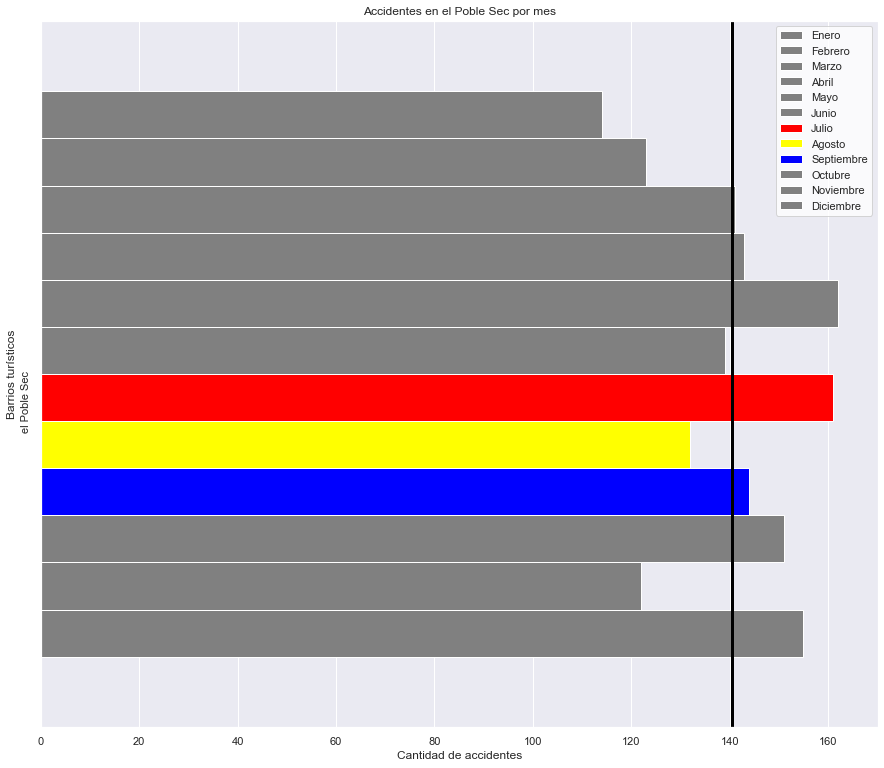

In [57]:
poble_sec = accidentes[accidentes['BARRIO'] == 'el Poble Sec']
poble_sec.replace(meses, inplace= True)
poble_sec.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = poble_sec);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en el Poble Sec por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=poble_sec.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/poble_sec_x_mes.png");

Julio --> Uno de los meses con mayor cantidad de accidentes registrados.

Agosto --> Cantidad por debajo de la media de accidentes.

Septiembre --> Cantidad media de accidentes.

## El Poblenou

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


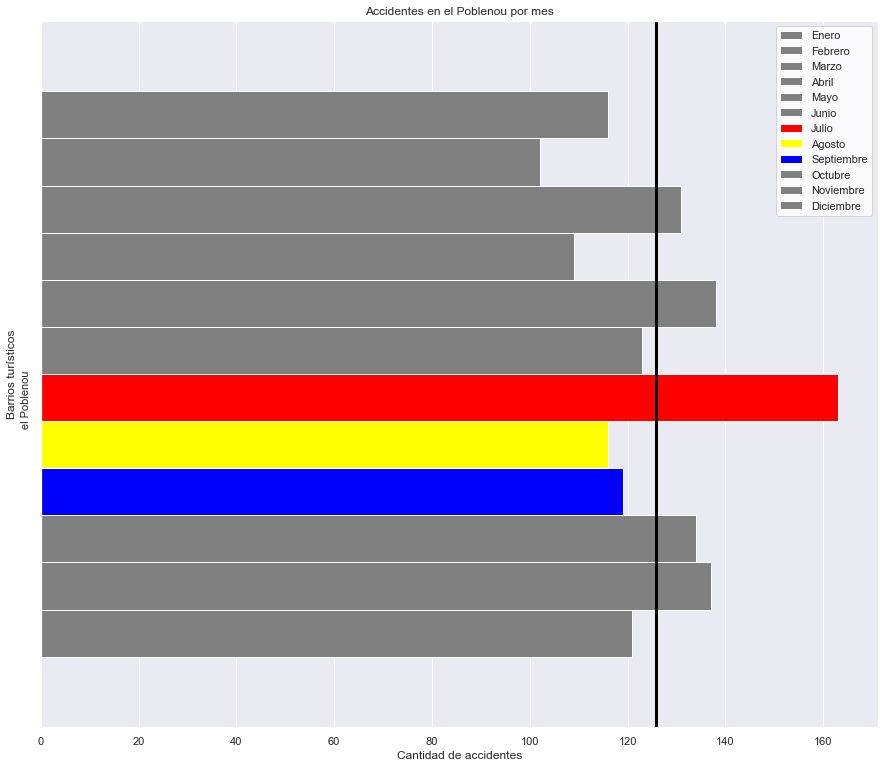

In [58]:
poblenou = accidentes[accidentes['BARRIO'] == 'el Poblenou']
poblenou.replace(meses, inplace= True)
poblenou.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = poblenou);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en el Poblenou por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=poblenou.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/poblenou_x_mes.png");

Julio --> Cantidad máxima de accidentes registrados.

Agosto --> Cantidad media/baja de accidentes.

Septiembre --> Cantidad media de accidentes.

## Sant Pere, Santa Caterina i la Ribera

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


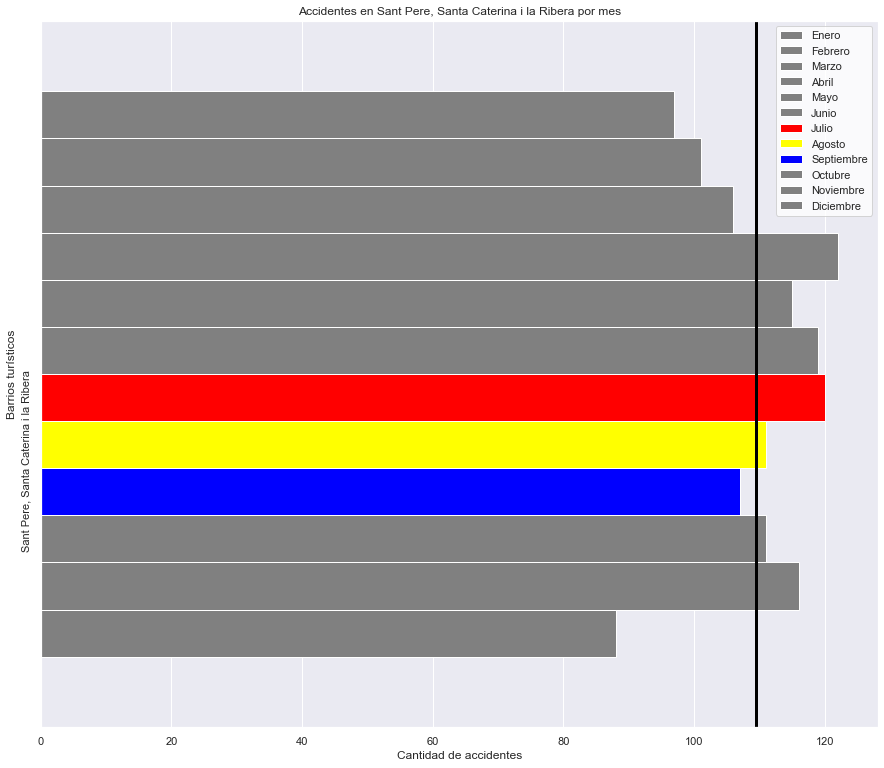

In [59]:
ribera = accidentes[accidentes['BARRIO'] == 'Sant Pere, Santa Caterina i la Ribera']
ribera.replace(meses, inplace= True)
ribera.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = ribera);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en Sant Pere, Santa Caterina i la Ribera por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=ribera.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/ribera_x_mes.png");

Julio --> Cantidad elevada de acci.

Agosto --> Cantidad media de accidentes.

Septiembre --> Cantidad media de accidentes.

## La Sagrada Família

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


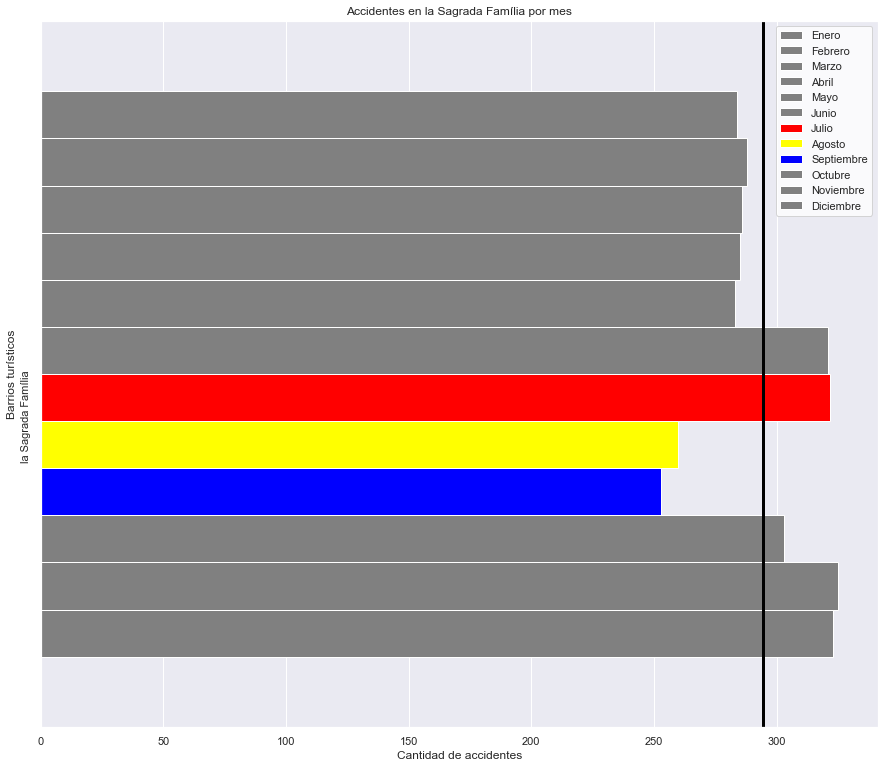

In [60]:
sagrada = accidentes[accidentes['BARRIO'] == 'la Sagrada Família']
sagrada.replace(meses, inplace= True)
sagrada.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = sagrada);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en la Sagrada Família por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=sagrada.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/sagrada_x_mes.png");

Julio --> Uno de los meses con mayor cantidad de accidentes registrados.

Agosto --> Junto con Septiembre, los meses con menos accidentes.

Septiembre --> Junto con Agosto, los meses con menos accidentes.

## La Nova Esquerra de l\'Eixample

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


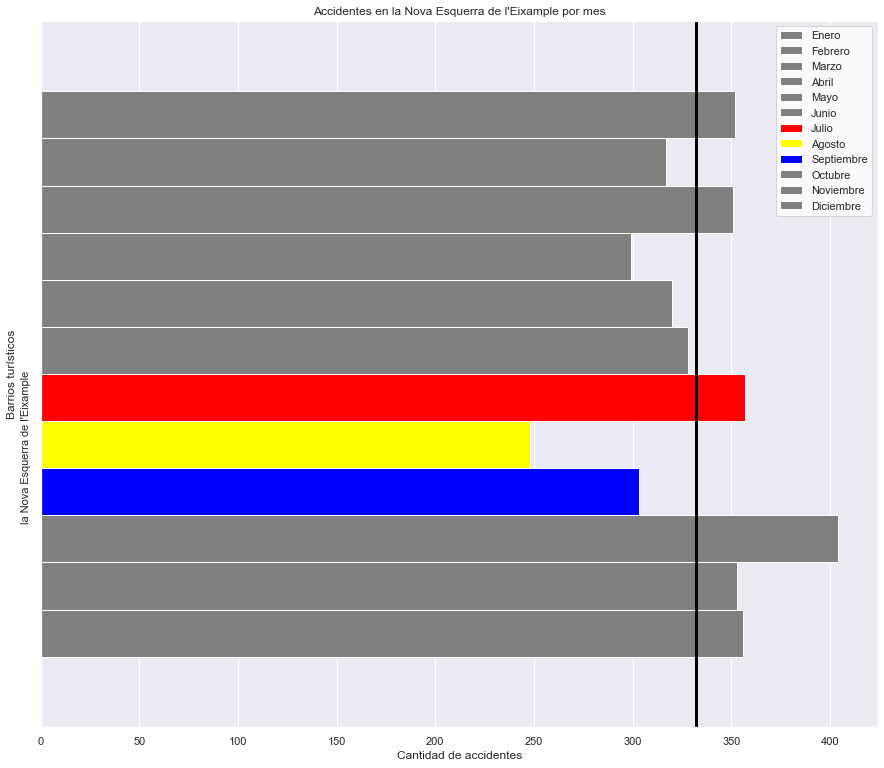

In [61]:
nova_esquerra = accidentes[accidentes['BARRIO'] == 'la Nova Esquerra de l\'Eixample']
nova_esquerra.replace(meses, inplace= True)
nova_esquerra.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = nova_esquerra);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en la Nova Esquerra de l\'Eixample por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=nova_esquerra.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/nova_esquerra_x_mes.png");

Julio --> Cantidad alta de accidentes.

Agosto --> Mes con menor número de accidentes.

Septiembre --> Cantidad media/baja de accidentes.

## El Fort Pienc

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


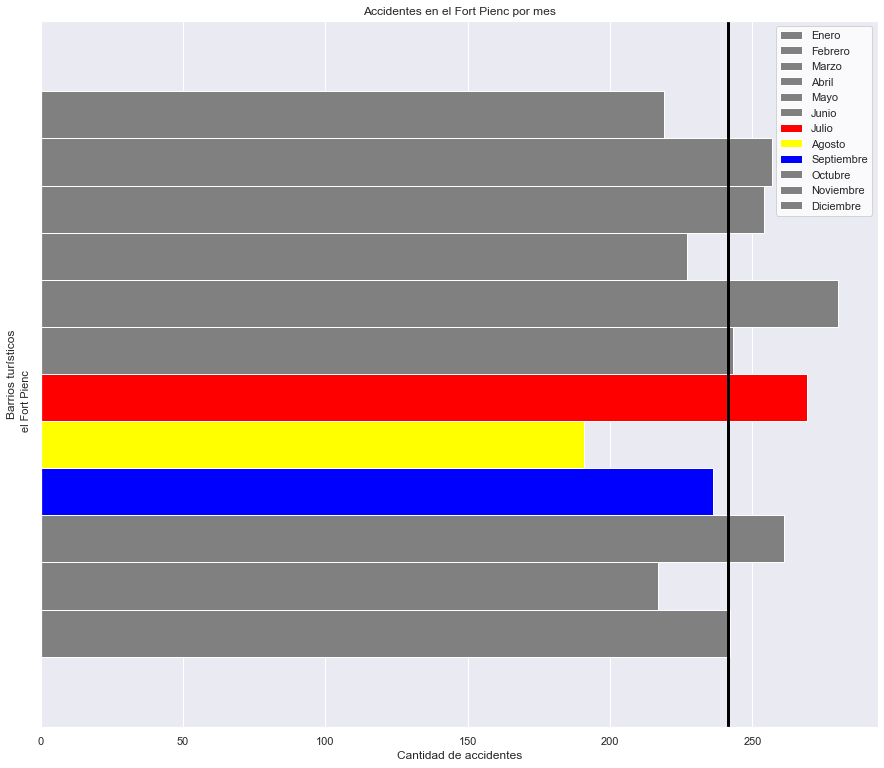

In [62]:
fort_pienc = accidentes[accidentes['BARRIO'] == 'el Fort Pienc']
fort_pienc.replace(meses, inplace= True)
fort_pienc.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = fort_pienc);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en el Fort Pienc por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=fort_pienc.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/fort_pienc_x_mes.png");

Julio --> Cantidad alta de accidentes.

Agosto --> Mes con menor número de accidentes.

Septiembre --> Cantidad media de accidentes.

## l'Antiga Esquerra de l'Eixample

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


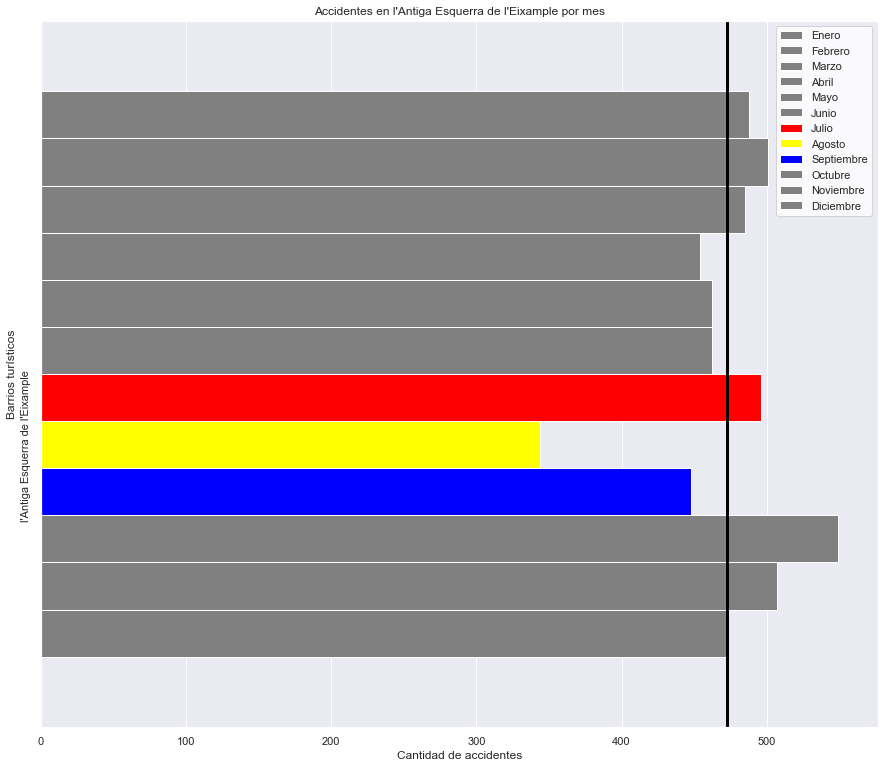

In [63]:
antigua_esquerra = accidentes[accidentes['BARRIO'] == "l'Antiga Esquerra de l'Eixample"]
antigua_esquerra.replace(meses, inplace= True)
antigua_esquerra.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = antigua_esquerra);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en l'Antiga Esquerra de l'Eixample por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=antigua_esquerra.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/antigua_esquerra_x_mes.png");

Julio --> Cantidad media/alta de accidentes.

Agosto --> Mes con menor número de accidentes.

Septiembre --> Cantidad media/baja de accidentes.

## La Dreta de l\'Eixample

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


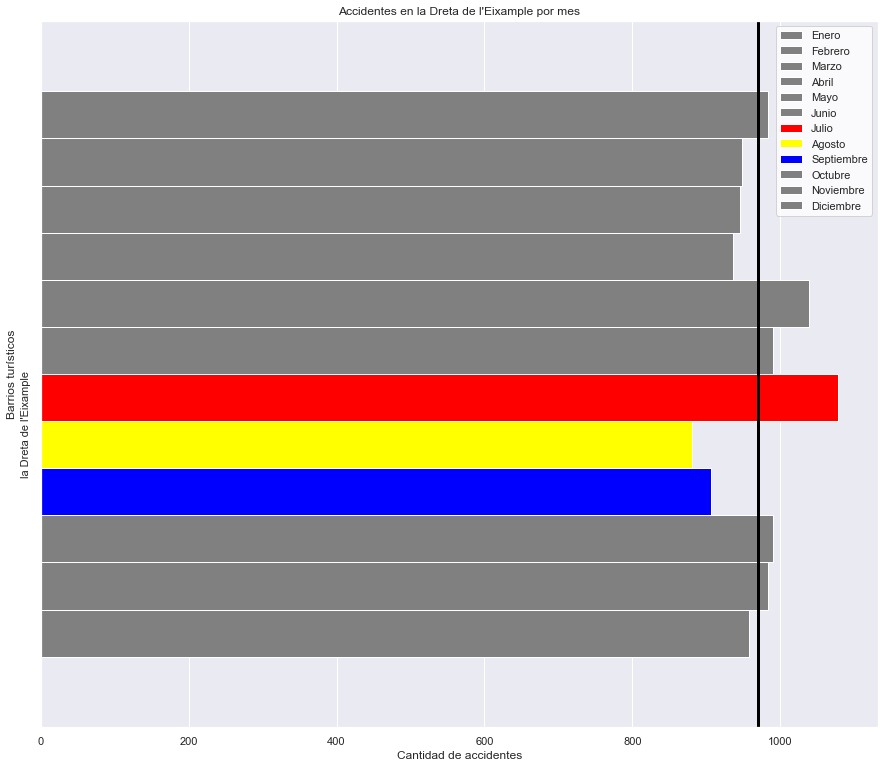

In [64]:
dreta = accidentes[accidentes['BARRIO'] == 'la Dreta de l\'Eixample']
dreta.replace(meses, inplace= True)
dreta.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = dreta);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en la Dreta de l\'Eixample por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=dreta.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/dreta_x_mes.png");

Julio --> Mes con mayor número de accidentes.

Agosto --> Mes con menor número de accidentes.

Septiembre --> Cantidad baja de accidentes.

## Barrio Sant Antoni

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


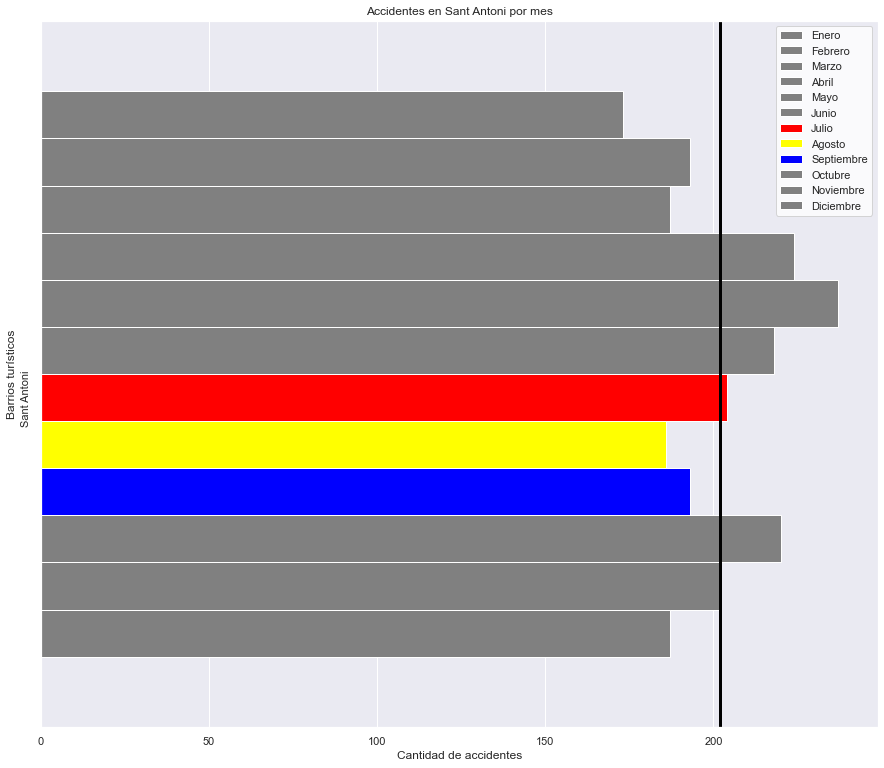

In [65]:
sant_antoni = accidentes[accidentes['BARRIO'] == 'Sant Antoni']
sant_antoni.replace(meses, inplace= True)
sant_antoni.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = sant_antoni);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en Sant Antoni por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=sant_antoni.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/sant_antoni_x_mes.png");

Julio --> Cantidad media de accidentes.

Agosto --> Cantidad baja de accidentes.

Septiembre --> Cantidad media de accidentes.

## La Vila de Gràcia

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4530: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
C:\Users\LeoFr\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


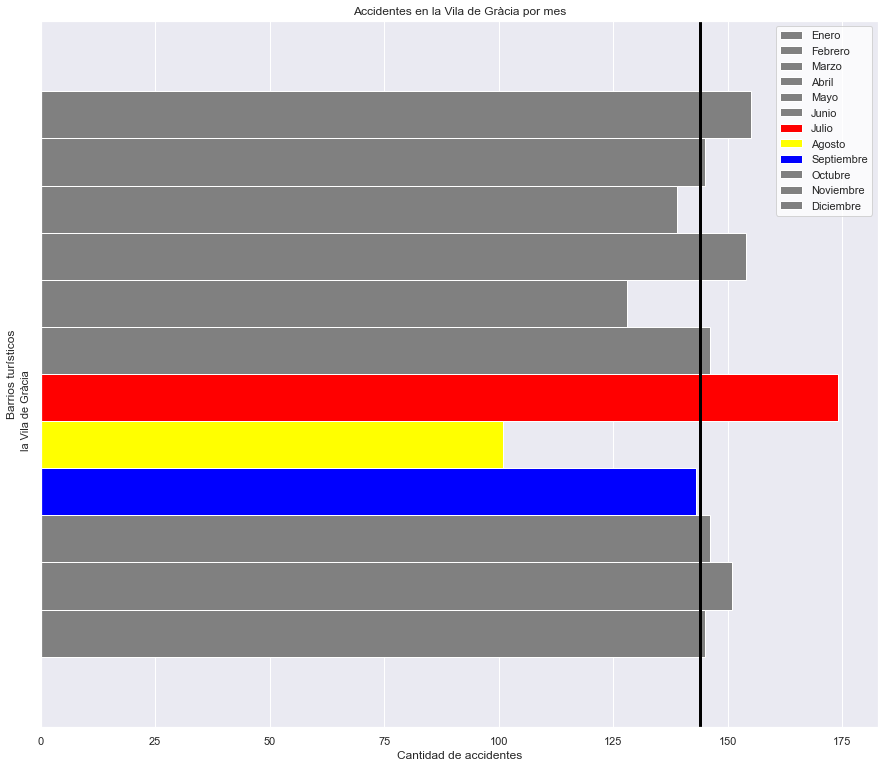

In [66]:
vila_gracia = accidentes[accidentes['BARRIO'] == 'la Vila de Gràcia']
vila_gracia.replace(meses, inplace= True)
vila_gracia.sort_values(by='MES', inplace= True)
sns.set(rc={"figure.figsize":(15,13)});

ax = sns.countplot(y = "BARRIO", hue = "MES", data = vila_gracia);
for p in ax.patches:
    if p == ax.patches[6]:
        p.set_facecolor('red')
    elif p == ax.patches[7]:
        p.set_facecolor('yellow')
    elif p == ax.patches[8]:
        p.set_facecolor('blue')
    else:
        p.set_facecolor('grey')

sns.set_style("whitegrid");
plt.title("Accidentes en la Vila de Gràcia por mes");
plt.ylabel("Barrios turísticos");
plt.yticks(rotation = 90);
plt.xlabel("Cantidad de accidentes");
plt.legend(meses);
plt.axvline(x=vila_gracia.groupby('MES').count().mean()[0], linewidth=3, color='black', label="mean");
plt.savefig("../reports/plots/vila_gracia_x_mes.png");

Julio --> Mes con mayor número de accidentes.

Agosto --> Mes con menor número de accidentes.

Septiembre --> Cantidad media de accidentes.

Al enfrentar los datos obtenidos con la hipótesis planteada, encontramos un resultado con una resolución ambigua.

Esto se debe a que, observando las gráficas, se aprecia que ``Julio`` representa uno de los meses con mayor número de accidentes registrados en los barrios más turísticos, siendo el varios casos el que ocupa el primer lugar. En contraposición con lo anterior, ``Agosto`` representa uno de los meses con menor número de accidentes en los mismos sitios, a excepción del barrio de La Barceloneta, que como se mencionó, cuenta con una de las playas más concurridas.

Para el caso de Septiembre, se mantiene generalmente con un número de accidentes intermedio o bajo.

La resolución lleva a concluir que la hipótesis planteada debería ser más acotada. Se debe tener en cuenta que la ciudad de Barcelona recibe gran cantidad de turistas durante estos meses de temporada alta, pero el mes predilecto en el que los lugareños suelen elegir para vacacionar en otros sitios es Agosto, cuando una gran cantidad de locales y empresas cierran sus puertas. Esto implica una importante disminución de traslados en vehículos particulares, enfrentado a una gran cantidad de turistas que en su mayoría utilizan transportes públicos. Muy probablemente sea éste el motivo que marca una brecha tan grande entre los meses de Julio y Agosto.

En la siguiente gráfica se puede ver que para todos los accidentes registrados en la ciudad, Agosto es, con ventaja, el que menor número contabilizó, mientras que Julio se sitúa en el segundo puesto en cantidad.

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


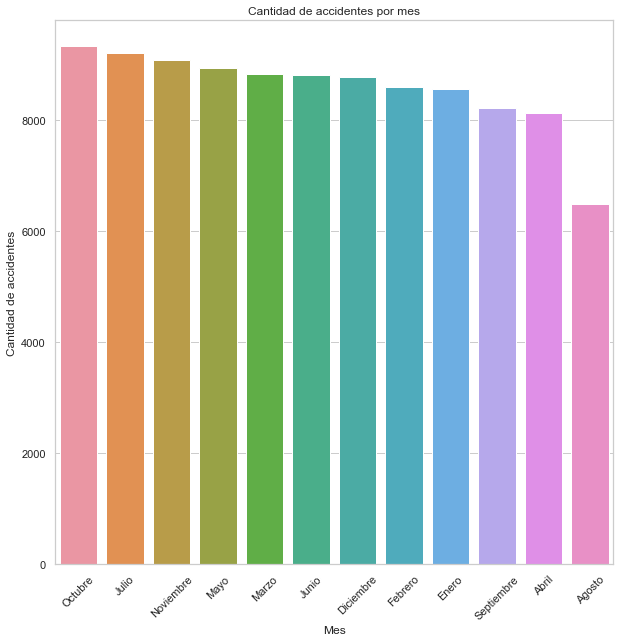

In [67]:
plt.figure(figsize=(10,10))
sns.countplot(accidentes['MES'], order= accidentes['MES'].value_counts().index)
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Mes')
plt.title('Cantidad de accidentes por mes')
plt.xticks(rotation = 45);
plt.savefig("../reports/plots/x_mes.png");

Ahondando un poco más en el registro de accidentes, se tiene la posibilidad de evaluar la peligrosidad de los mismos, con la idea de conocer cuántas víctimas, ya sean desde leves hasta fatales, suele haber en cada uno.

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


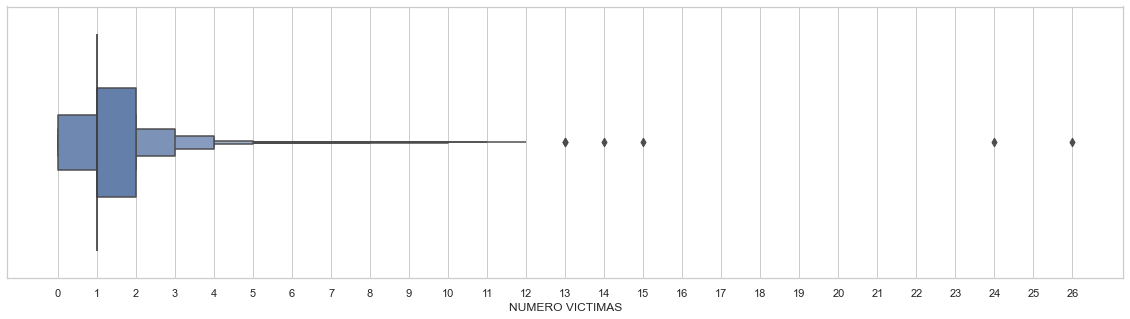

In [68]:
plt.figure(figsize=(20,5))
sns.boxenplot(accidentes['NUMERO VICTIMAS'])
plt.xticks(np.arange(0, 26+1, 1))
increments = 1
ax = plt.gca()
start, end = ax.get_ylim()
ax.yaxis.set_ticks(np.arange(start, end, increments))
plt.savefig("../reports/plots/victimas_x_accidente.png")

La mayoría de los accidentes dejan un saldo de una víctima. Asímismo, se observan sucesos que contabilizan hasta 26 víctimas. Estas situaciones permiten pensar que se trata de siniestros en los que se han implicado vehículos de un gran número de plazas, o bien, que ha acontecido un accidente en cadena.

Si se decide evaluar ahora el número de accidentes en función del día de la semana, el resultado será:

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


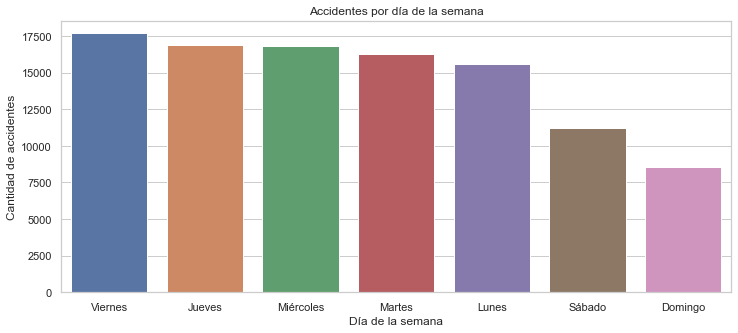

In [69]:
plt.figure(figsize=(12,5));
sns.countplot(accidentes['DIA SEMANA'], order= accidentes['DIA SEMANA'].value_counts().index);
plt.ylabel('Cantidad de accidentes');
plt.xlabel('Día de la semana');
plt.title('Accidentes por día de la semana')
plt.savefig("../reports/plots/accidente_x_dia.png");

Se obtiene un resultado bastante esperado, donde de lunes a viernes se contabilizan una cantidad bastante pareja de sucesos, mientras que en el fin de semana disminuyen considerablemente, más aun para el día domingo, que supone ser el que menor número de personas tiene desplazándose a sus trabajos.

Se tiene ahora la posibilidad de evaluar los siniestros ocurridos para cada día de la semana, teniendo ahora en cuenta en turno en el que se dan.

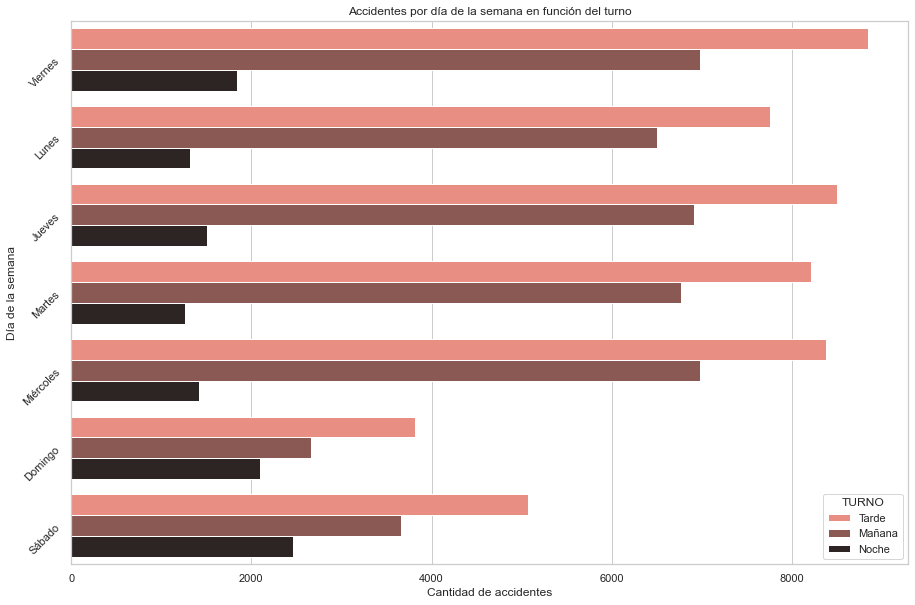

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(y = accidentes['DIA SEMANA'],hue='TURNO',  data= accidentes, palette= "dark:salmon_r")
plt.yticks(rotation = 45)
plt.xlabel('Cantidad de accidentes')
plt.ylabel('Día de la semana')
plt.title("Accidentes por día de la semana en función del turno")
plt.savefig("../reports/plots/dias_x_turno.png")

Nuevamente se puede observar un resultado medianamente esperado, donde se visualiza que la mayoría de accidentes durante el turno noche se dan los viernes, sábado y domingo, donde la gente suele tener más vida nocturna y una mayor ingesta de alcohol.

Indagando un poco más sobre esto, se reproduce una visualización de la distribución de accidentes según la hora para estos tres días.

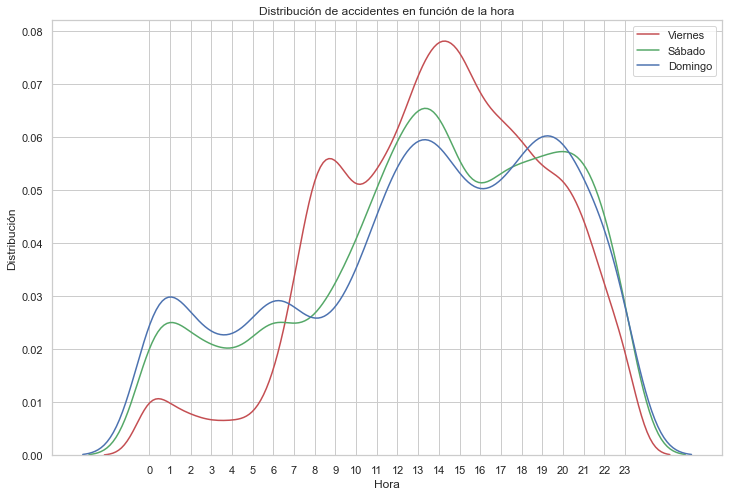

In [71]:
accidentes_viernes = accidentes[accidentes['DIA SEMANA'] == 'Viernes']
accidentes_sabado = accidentes[accidentes['DIA SEMANA'] == 'Sábado']
accidentes_domingo = accidentes[accidentes['DIA SEMANA'] == 'Domingo']
plt.figure(figsize=(12,8))
sns.kdeplot(accidentes_viernes['HORA'], color = "r", label = "Viernes")
sns.kdeplot(accidentes_sabado['HORA'], color = "g", label = "Sábado")
sns.kdeplot(accidentes_domingo['HORA'], color = "b", label = "Domingo")
plt.xticks(np.arange(0, 24, 1))
ax.yaxis.set_ticks(np.arange(start, end, increments))
plt.title('Distribución de accidentes en función de la hora')
plt.xlabel('Hora')
plt.ylabel('Distribución')
plt.legend()
plt.savefig("../reports/plots/finde_x_hora.png")

A pesar de contar con un mayor número de sucesos durante el turno noche, continúa siendo evidente que los turnos mañana y tarde son los más perjudicados a la hora de contabilizar accidentes.

La siguiente podría tratarse de una visualización poco ortodoxa, pero intenta representar una comparación entre los horarios en los que suceden siniestros por cada día de la semana.

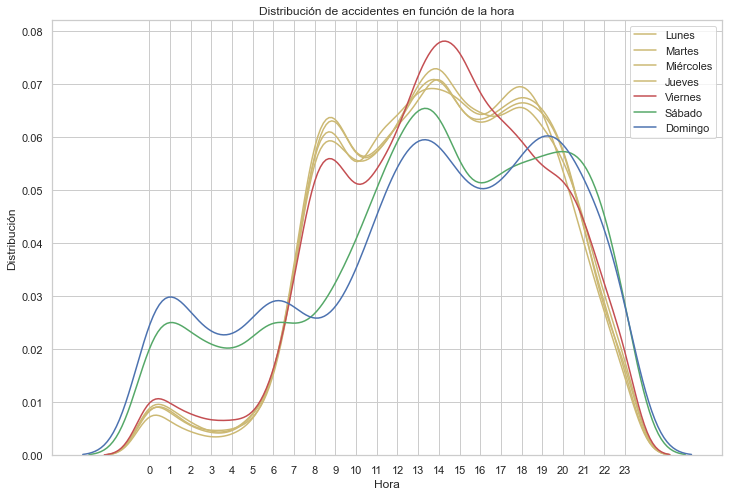

In [72]:
accidentes_lunes = accidentes[accidentes['DIA SEMANA'] == 'Lunes']
accidentes_martes = accidentes[accidentes['DIA SEMANA'] == 'Martes']
accidentes_miercoles = accidentes[accidentes['DIA SEMANA'] == 'Miércoles']
accidentes_jueves = accidentes[accidentes['DIA SEMANA'] == 'Jueves']
accidentes_viernes = accidentes[accidentes['DIA SEMANA'] == 'Viernes']
accidentes_sabado = accidentes[accidentes['DIA SEMANA'] == 'Sábado']
accidentes_domingo = accidentes[accidentes['DIA SEMANA'] == 'Domingo']
plt.figure(figsize=(12,8));
sns.kdeplot(accidentes_lunes['HORA'], color = "y", label = "Lunes");
sns.kdeplot(accidentes_martes['HORA'], color = "y", label = "Martes");
sns.kdeplot(accidentes_miercoles['HORA'], color = "y", label = "Miércoles");
sns.kdeplot(accidentes_jueves['HORA'], color = "y", label = "Jueves");
sns.kdeplot(accidentes_viernes['HORA'], color = "r", label = "Viernes");
sns.kdeplot(accidentes_sabado['HORA'], color = "g", label = "Sábado");
sns.kdeplot(accidentes_domingo['HORA'], color = "b", label = "Domingo");
plt.xticks(np.arange(0, 24, 1));
ax.yaxis.set_ticks(np.arange(start, end, increments));
plt.title('Distribución de accidentes en función de la hora')
plt.xlabel('Hora')
plt.ylabel('Distribución')
plt.legend();
plt.savefig("../reports/plots/finde_vs_semana_x_hora.png");

Aquí se puede ver lo ajustadas que son las líneas correspondientes a los horarios de accidentes para los días de lunes a jueves en todos los turnos. Asimismo, para el día viernes, el turno mañana se ajusta también bastante al resto de los días laborables. Se puede ver también que en el caso del viernes, hay un pico más elevado a las 14 hs., y no presenta el pico que se verifica de lunes a jueves a las 18 hs. Esto puede deberse, seguramente, a la cantidad de personas que realizan horarios intensivos los viernes, partiendo de su trabajo más tempranamente.

Por último, en esta gráfica se visualiza mucho mejor la diferencia que hay entre los accidentes en las noches más movidas de la ciudad, respecto de los que se dan en víspera de día laborable.

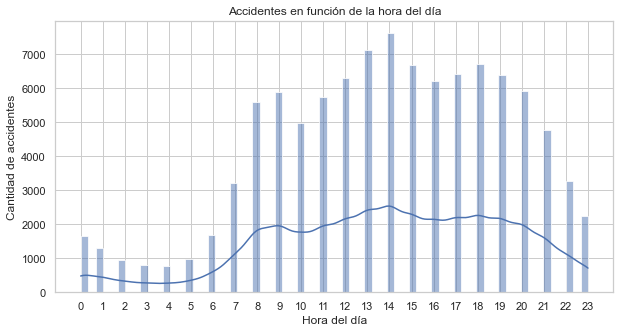

In [73]:
plt.figure(figsize=(10,5));
sns.histplot(accidentes['HORA'], kde = True);
plt.xticks(np.arange(0, 24, 1));
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Hora del día')
plt.title('Accidentes en función de la hora del día')
plt.savefig("../reports/plots/x_hora_general.png")

En la gráfica anterior podemos ver el histograma siniestro viales respecto de la hora del día, y su distribución.

En la siguiente, se puede apreciar cómo ha ido variando el número de accidentes en función del año.

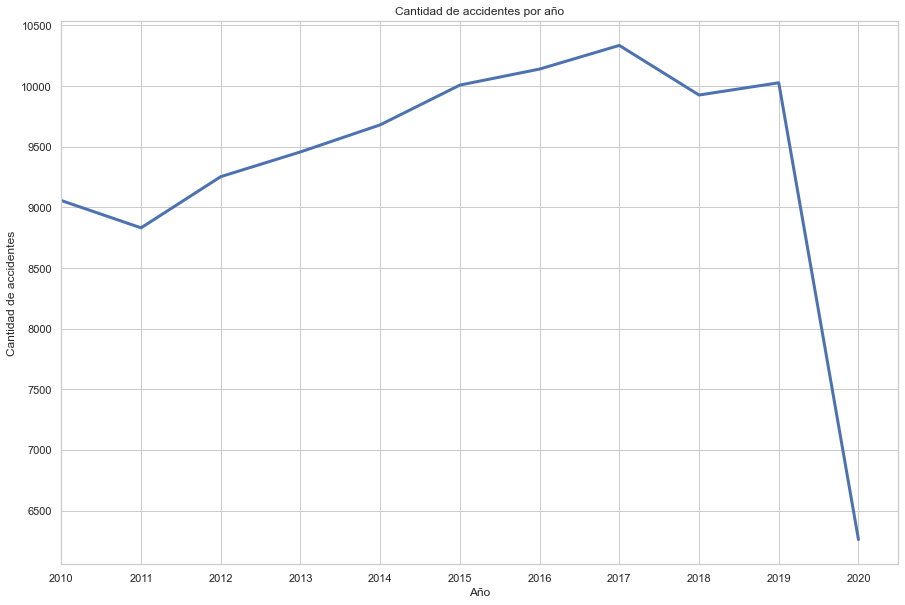

In [74]:
accidentes_x_ano = accidentes.groupby('ANO').count()
plt.figure(figsize=(15,10))
sns.lineplot(data = accidentes_x_ano,
            x = 'ANO',
            y = 'NUMERO EXPEDIENTE',
            linewidth = 3)
plt.xlabel('Año')
plt.xticks(np.arange(2010, 2021, 1))
plt.title('Cantidad de accidentes por año')
plt.xlim(2010)
plt.ylabel('Cantidad de accidentes')
plt.savefig("../reports/plots/accidentes_x_ano.png")

Se puede ver cómo los accidentes tienden a aumentar con el correr de los años. Finalmente, se ve una gran depresión en el número de registros para el año 2020. Sin lugar a dudas, las medidas que han sido tomadas para controlar la pandemia por Covid-19 tuvieron una influencia inequívoca sobre los siniestros viales.

Por último, haciendo un heatmap para cada uno de nuestros datos, se observa que la cantidad de lesionados leves cuenta con una correlación áltamente positiva respecto del número de víctimas, a diferencia de los gravemente heridos y fallecidos. Esto podría deberse a la cultura que se ha instaurado en la gente de la ciudad a la hora de protegerse frente a accidentes viales, ya sea mediante el uso de cinturones de seguridad, cascos y otras protecciones para motoristas, y respeto por los límites de velocidad.

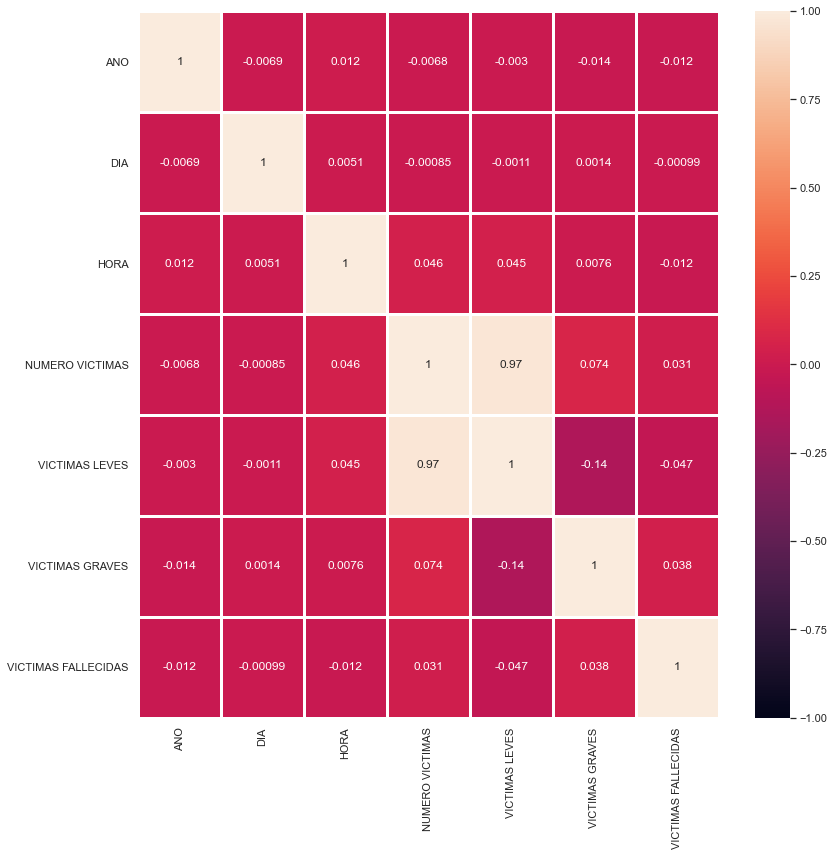

In [75]:
plt.subplots(figsize=(13, 13))
sns.heatmap(accidentes.corr(),
           vmin = -1,
           vmax = 1,
            annot = True,
           linewidths = 3)
plt.savefig("../reports/plots/heatmap.png")

---

### Tendencias de columnas restantes

## Número de víctimas por accidente

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


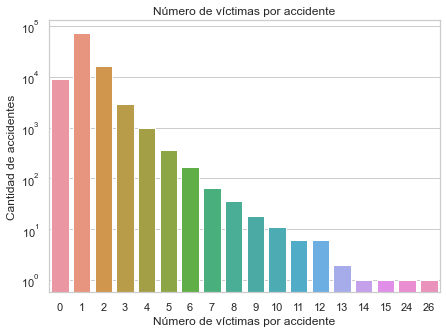

In [76]:
plt.figure(figsize=(7,5))
g = sns.countplot(accidentes['NUMERO VICTIMAS'])
g.set(yscale="log")
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Número de víctimas por accidente')
plt.title('Número de víctimas por accidente')
plt.savefig("../reports/plots/victimas_x_accidente.png");

## Número de víctimas leves por accidente

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


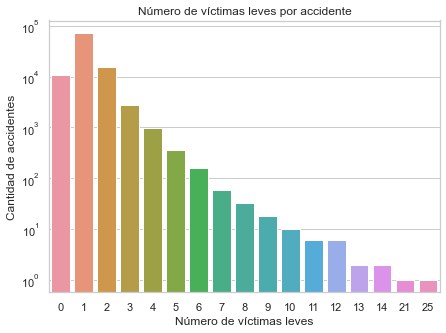

In [77]:
plt.figure(figsize=(7,5))
g = sns.countplot(accidentes['VICTIMAS LEVES'])
g.set(yscale="log")
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Número de víctimas leves')
plt.title('Número de víctimas leves por accidente')
plt.savefig("../reports/plots/victimas_leves_x_accidente.png");

## Número de víctimas graves por accidente

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


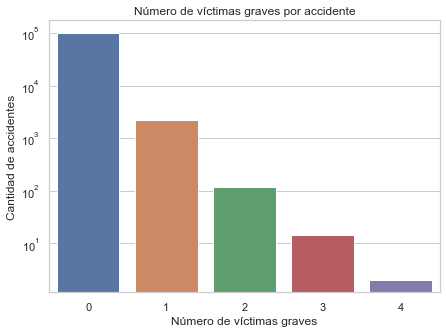

In [78]:
plt.figure(figsize=(7,5))
g = sns.countplot(accidentes['VICTIMAS GRAVES'])
g.set(yscale="log")
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Número de víctimas graves')
plt.title('Número de víctimas graves por accidente')
plt.savefig("../reports/plots/victimas_graves_x_accidente.png");

## Número de víctimas fatales por accidente

C:\Users\LeoFr\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


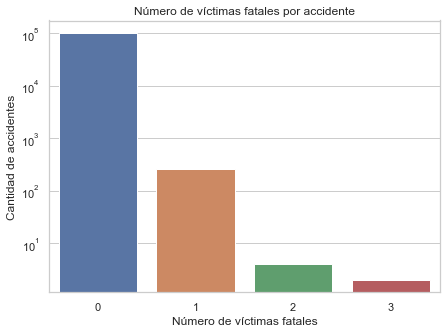

In [79]:
plt.figure(figsize=(7,5))
g = sns.countplot(accidentes['VICTIMAS FALLECIDAS'])
g.set(yscale="log")
plt.ylabel('Cantidad de accidentes')
plt.xlabel('Número de víctimas fatales')
plt.title('Número de víctimas fatales por accidente')
plt.savefig("../reports/plots/victimas_fatales_x_accidente.png");

# Pie Chart

In [80]:
horas_piechart = fo.excel_resources_df('Horas_trabajo.xlsx')

In [81]:
horas_piechart.set_index('Tarea realizada', inplace= True)

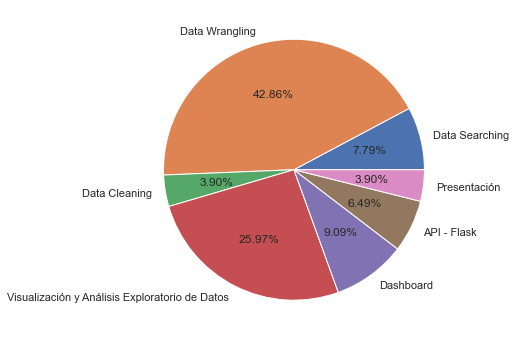

In [82]:
plt.figure(figsize = (6,6))
plt.pie(horas_piechart.Horas,
       labels = horas_piechart.index,
       autopct='%1.2f%%')
plt.savefig("../reports/plots/piechart_tiempo.png");